In [1]:
import os
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('QuantumDNA')]+ 'QuantumDNA'
os.chdir(ROOT_DIR)

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from qDNA.tools import *
from qDNA import *

# Dephasing Coherence

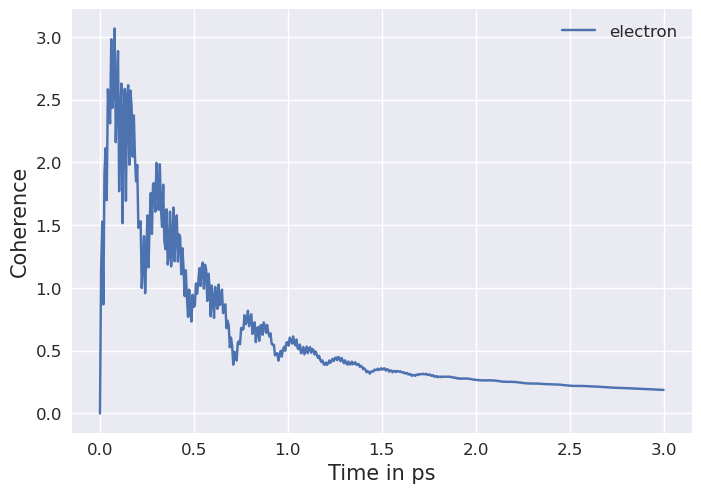

In [3]:
# local dephasing 
# since the equilibrium state does not contain off-diagonal elements the coherence relaxes to zero

# parameters
kwargs=dict(description='1P', particles=['electron'], loc_deph_rate=3)
upper_strand, tb_model_name= 'GCG', 'ELM'

# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
fig, ax = plt.subplots()
plot_coh(ax, me_solver)

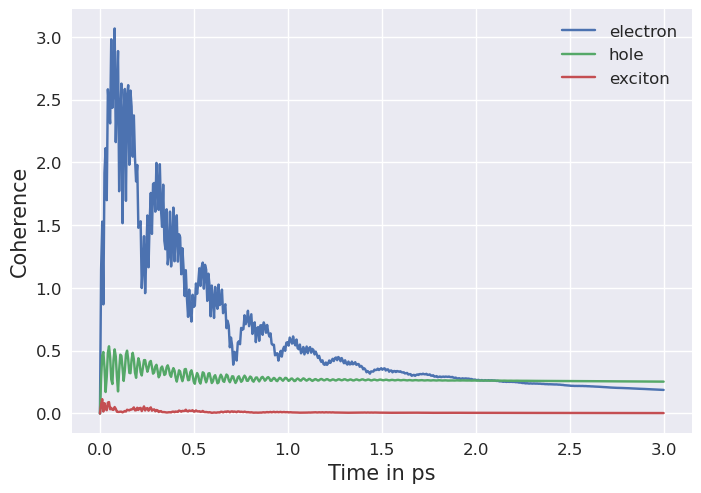

In [4]:
# local dephasing 
# since the equilibrium state does not contain off-diagonal elements the coherence relaxes to zero

# parameters
kwargs=dict(description='2P', loc_deph_rate=3)
upper_strand, tb_model_name= 'GCG', 'ELM'

# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
fig, ax = plt.subplots()
plot_coh(ax, me_solver)

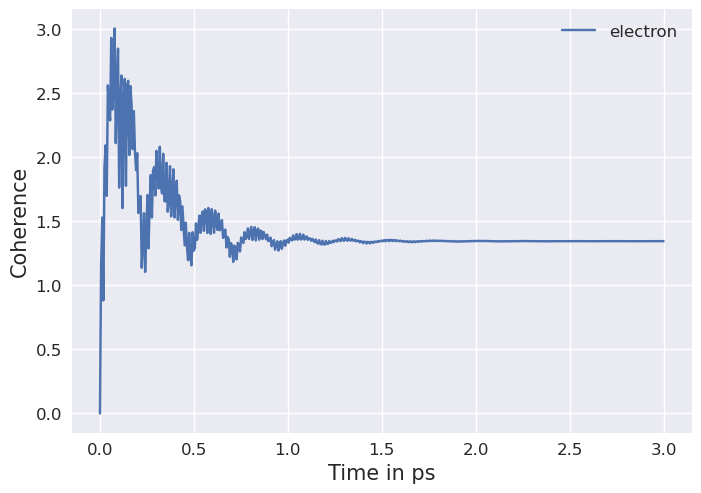

In [5]:
# global dephasing 
# since the equilibrium state contains off-diagonal elements the coherence reaches a plateau at a non-zero value

# parameters
kwargs=dict(description='1P', particles=['electron'], glob_deph_rate=3)
upper_strand, tb_model_name= 'GCG', 'ELM'

# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
fig, ax = plt.subplots()
plot_coh(ax, me_solver)

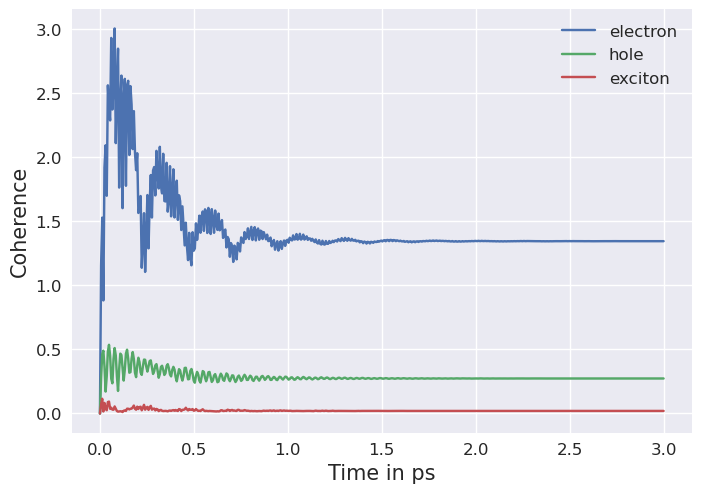

In [6]:
# local dephasing 
# since the equilibrium state does not contain off-diagonal elements the coherence relaxes to zero

# parameters
kwargs=dict(description='2P', glob_deph_rate=3)
upper_strand, tb_model_name= 'GCG', 'ELM'

# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
fig, ax = plt.subplots()
plot_coh(ax, me_solver)

# Dephasing Populations

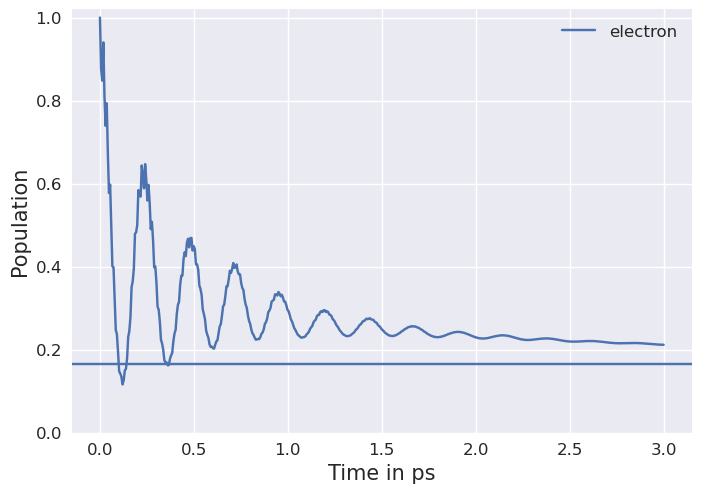

In [7]:
# parameters
kwargs=dict(description='1P', particles=['electron'], loc_deph_rate=3)
upper_strand, tb_model_name= 'GCG', 'ELM'
tb_site = '(0, 0)'

# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
fig, ax = plt.subplots()
plot_pop(ax, tb_site, me_solver)
eq_state = get_deph_eq_state(me_solver)
ax.axhline(y=eq_state[0,0].real)
plt.show()

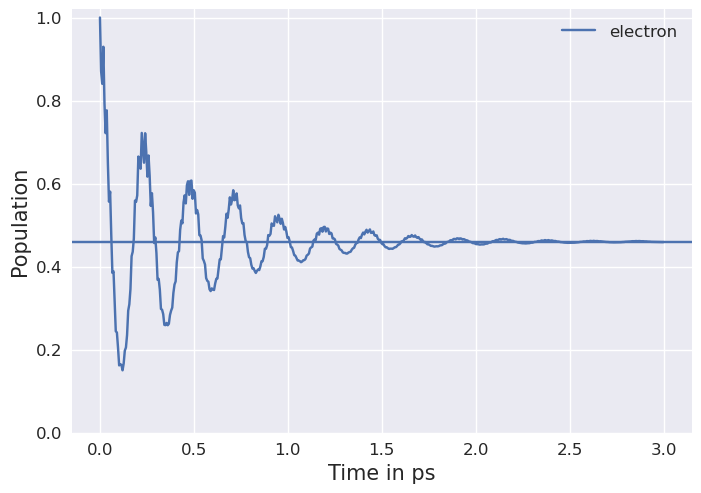

In [8]:
# parameters
kwargs=dict(description='1P', particles=['electron'], glob_deph_rate=2)
upper_strand, tb_model_name= 'GCG', 'ELM'
tb_site = '(0, 0)'

# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
fig, ax = plt.subplots()
plot_pop(ax, tb_site, me_solver)
eq_state = get_deph_eq_state(me_solver)
ax.axhline(y=eq_state[0,0].real)

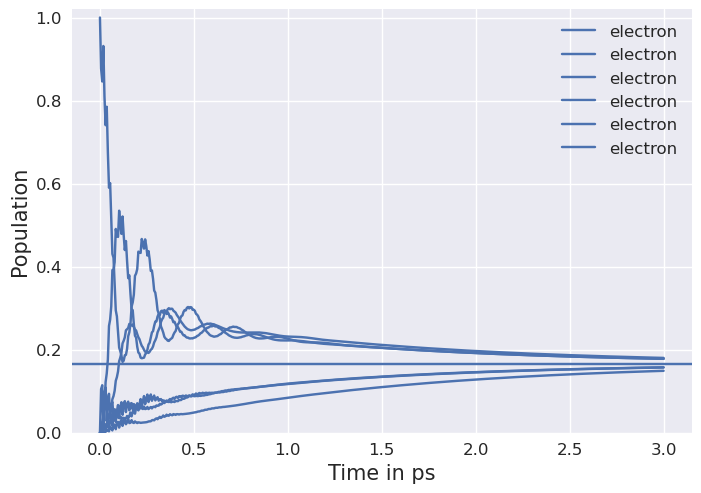

In [9]:
# parameters
kwargs=dict(description='1P', particles=['electron'], loc_deph_rate=7)
upper_strand, tb_model_name= 'GCG', 'ELM'

# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
fig, ax = plt.subplots()
for tb_site in me_solver.tb_ham.tb_basis:
    plot_pop(ax, tb_site, me_solver)
eq_state = get_deph_eq_state(me_solver)
ax.axhline(y=eq_state[0,0].real)

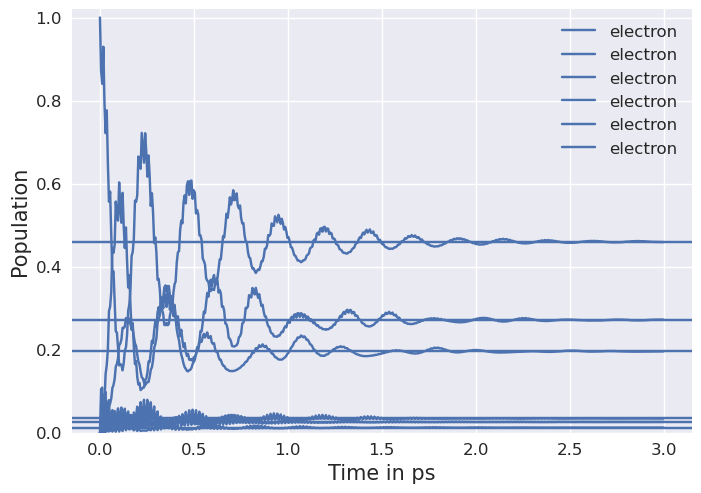

In [10]:
# parameters
kwargs=dict(description='1P', particles=['electron'], glob_deph_rate=2)
upper_strand, tb_model_name= 'GCG', 'ELM'

# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
fig, ax = plt.subplots()
eq_state = get_deph_eq_state(me_solver)
for i, tb_site in enumerate( me_solver.tb_ham.tb_basis ):
    plot_pop(ax, tb_site, me_solver)
    ax.axhline(y=eq_state[i,i].real)

# Thermalising

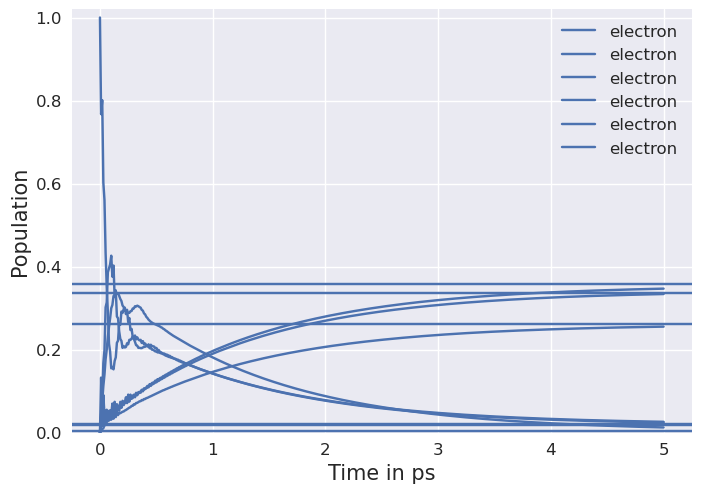

In [11]:
# parameters
kwargs=dict(description='1P', particles=['electron'], glob_therm=True, t_end=5)
upper_strand, tb_model_name= 'GCG', 'ELM'

# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
fig, ax = plt.subplots()
eq_state = get_therm_eq_state(me_solver)
for i, tb_site in enumerate( me_solver.tb_ham.tb_basis ):
    plot_pop(ax, tb_site, me_solver)
    ax.axhline(y=eq_state[i,i].real)

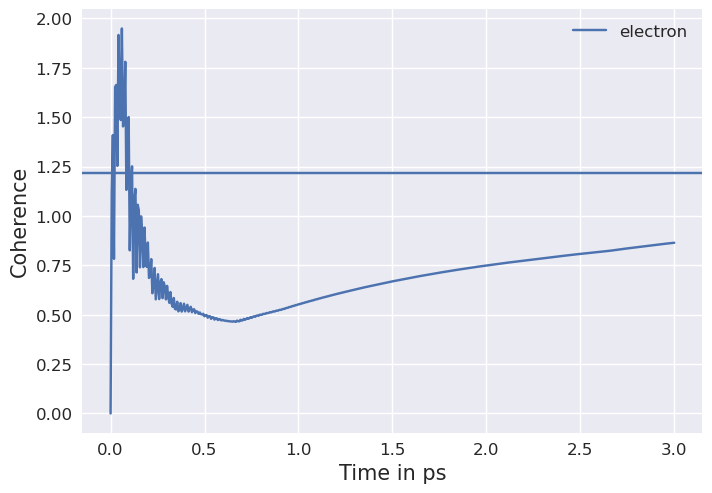

In [12]:
# parameters
kwargs=dict(description='1P', particles=['electron'], glob_therm=True, t_end=3)
upper_strand, tb_model_name= 'GCG', 'ELM'
  
# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
eq_state = get_therm_eq_state(me_solver)
fig, ax = plt.subplots()
plot_coh(ax, me_solver)
plt.axhline( y=calc_coherence(eq_state) )
plt.show()

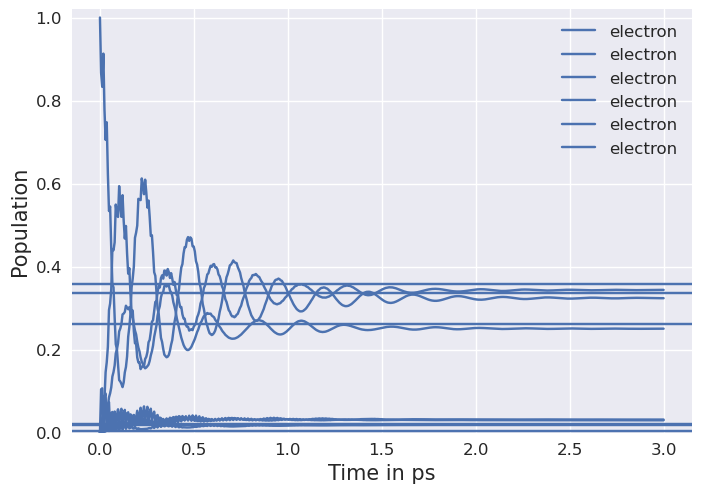

In [13]:
# parameters
kwargs=dict(description='1P', particles=['electron'], loc_therm=True, t_end=3)
upper_strand, tb_model_name= 'GCG', 'ELM'

# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
fig, ax = plt.subplots()
eq_state = get_therm_eq_state(me_solver)
for i, tb_site in enumerate( me_solver.tb_ham.tb_basis ):
    plot_pop(ax, tb_site, me_solver)
    ax.axhline(y=eq_state[i,i].real)

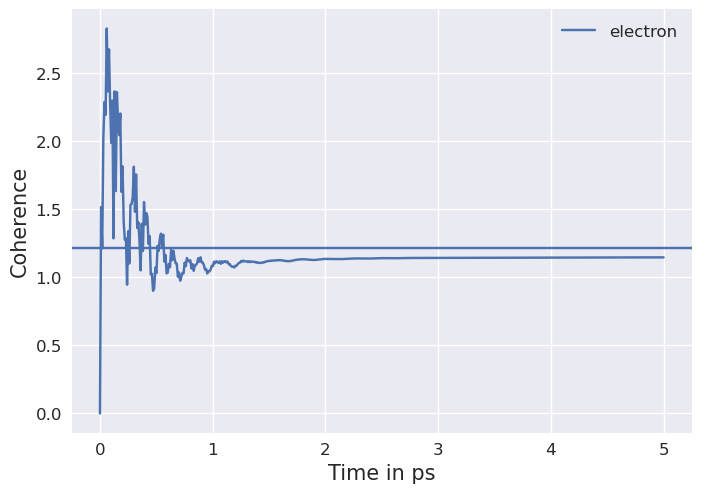

In [14]:
# parameters
kwargs=dict(description='1P', particles=['electron'], loc_therm=True, t_end=5)
upper_strand, tb_model_name= 'GCG', 'ELM'
  
# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
eq_state = get_therm_eq_state(me_solver)
fig, ax = plt.subplots()
plot_coh(ax, me_solver)
ax.axhline( y=calc_coherence(eq_state) )
plt.show()

# Trace distance, purity and IPR

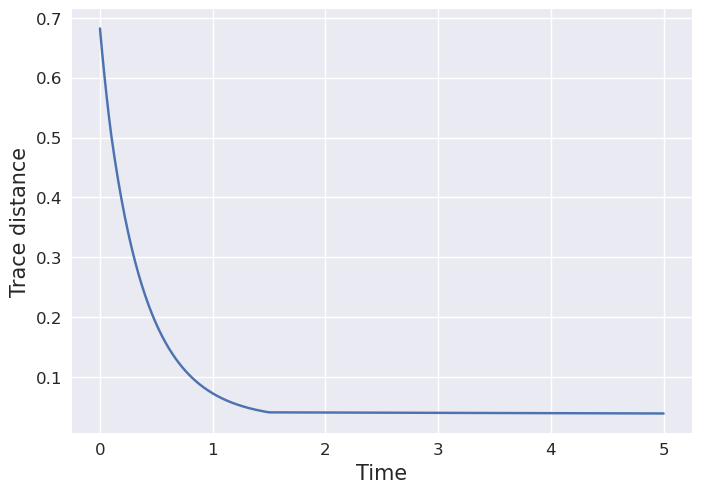

In [15]:
# parameters
kwargs=dict(description='1P', particles=['electron'], loc_therm=True, t_end=5)
upper_strand, tb_model_name= 'GCG', 'ELM'

me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
eq_state = get_therm_eq_state(me_solver)
dms = me_solver.get_result()

# plotting
fig, ax = plt.subplots()
ax.plot(me_solver.times, [ calc_trace_distance(dm, eq_state) for dm in dms ] )
ax.set_ylabel('Trace distance')
ax.set_xlabel('Time')
plt.show()

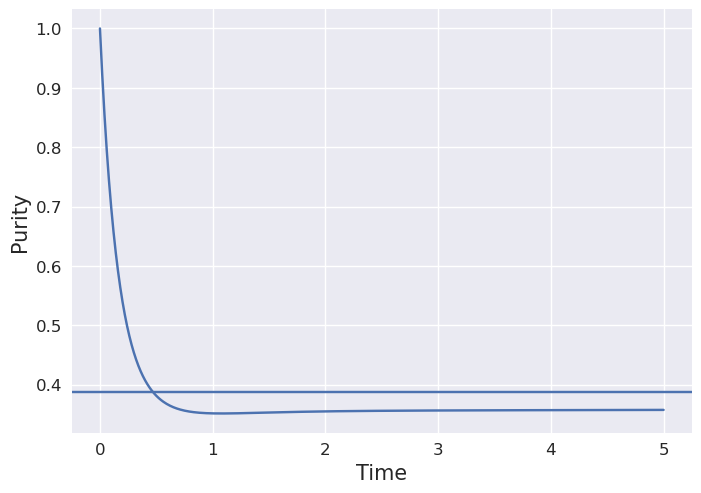

In [16]:
# parameters
kwargs=dict(description='1P', particles=['electron'], loc_therm=True, t_end=5)
upper_strand, tb_model_name= 'GCG', 'ELM'

me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
eq_state = get_therm_eq_state(me_solver)
dms = me_solver.get_result()

# plotting
fig, ax = plt.subplots()
ax.plot(me_solver.times, [ calc_purity(dm.full()) for dm in dms ] )
ax.axhline( y=calc_purity(eq_state) )
ax.set_ylabel('Purity')
ax.set_xlabel('Time')
plt.show()

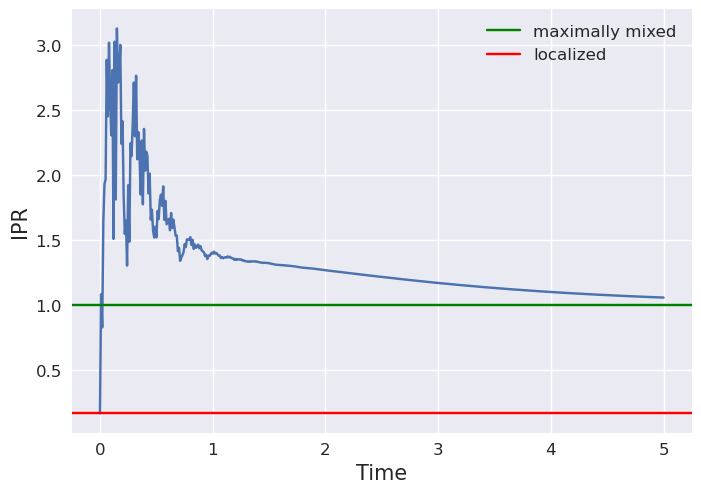

In [17]:
# parameters
kwargs=dict(description='1P', particles=['electron'], loc_deph_rate=5, t_end=5)
upper_strand, tb_model_name= 'GCG', 'ELM'
  
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
eq_state = get_deph_eq_state(me_solver)
dms = me_solver.get_result()

# plotting
fig, ax = plt.subplots()
ax.plot(me_solver.times, [ calc_ipr_dm(dm.full()) for dm in dms ] )
ax.axhline( y=calc_ipr_dm(eq_state), color='g', label='maximally mixed' )
ax.axhline( y=1/6, color='r', label='localized')
ax.set_ylabel('IPR')
ax.set_xlabel('Time')
ax.legend()
plt.show()

# Eigenstate IPR

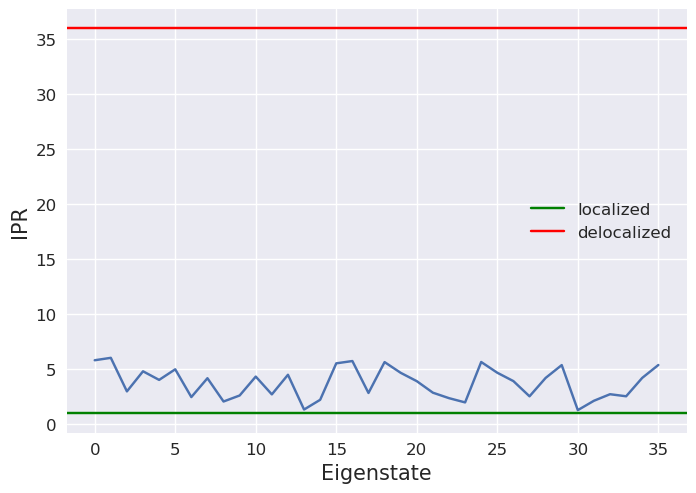

In [18]:
# Hamiltonian IPR
kwargs=dict(description='2P', particles=['electron'])
tb_ham = TB_Ham(DNA_Seq('GCG', 'ELM'), **kwargs)
eigs = tb_ham.get_eigensystem()[1]

# plotting
fig, ax = plt.subplots()
ax.plot( calc_ipr_hamiltonian(eigs) )
ax.axhline( y=1, color='g', label='localized' )
ax.axhline( y=36, color='r', label='delocalized')
ax.set_xlabel('Eigenstate')
ax.set_ylabel('IPR')
ax.legend()
plt.show()

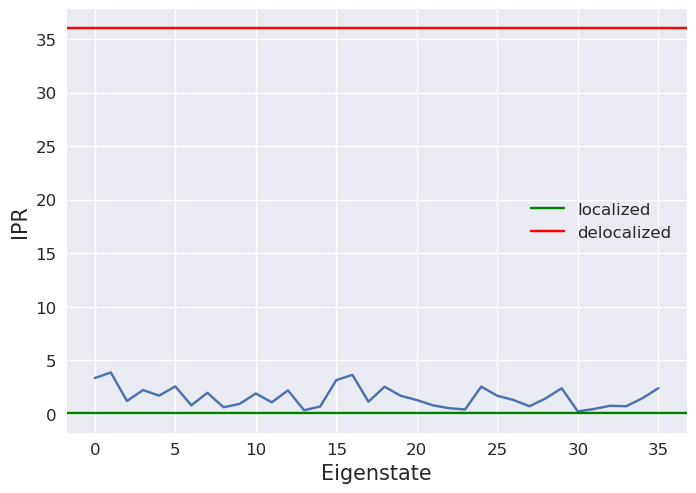

In [19]:
# density matrix IPR
kwargs=dict(description='2P', particles=['electron'])
tb_ham = TB_Ham(DNA_Seq('GCG', 'ELM'), **kwargs)
eigs = tb_ham.get_eigensystem()[1]

# plotting
fig, ax = plt.subplots()
ipr_list = []
for i in range(36):
    dm = np.outer(eigs[:, i], eigs[:, i].conj())
    ipr_list.append( calc_ipr_dm(dm) )
ax.plot( ipr_list )
ax.axhline( y=1/36, color='g', label='localized' )
ax.axhline( y=36, color='r', label='delocalized')
ax.set_xlabel('Eigenstate')
ax.set_ylabel('IPR')
ax.legend()
plt.show()

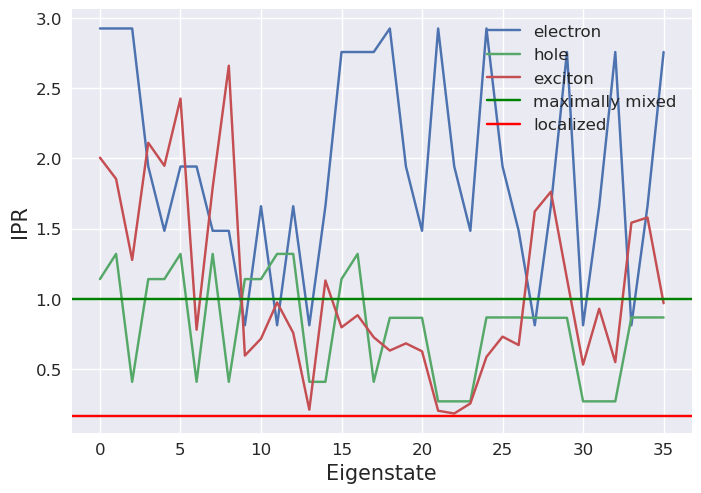

In [20]:
# similar to the plot above but reduced to particle subspaces 
kwargs=dict(description='2P', particles=['electron'])
tb_ham = TB_Ham(DNA_Seq('GCG', 'ELM'), **kwargs)

fig, ax = plt.subplots()
for particle in get_config()['PARTICLES']:
    ax.plot( [calc_ipr_dm( get_reduced_dm_eigs(tb_ham, particle, i) ) for i in range(36)], label=particle)

ax.axhline( y=1, color='g', label='maximally mixed' )
ax.axhline( y=1/6, color='r', label='localized')
ax.set_xlabel('Eigenstate')
ax.set_ylabel('IPR')
ax.legend()
plt.show()